# Fitting a model to data

A walkthrough of the exercises in the paper ['Data analysis recipes: fitting a model to data'](https://arxiv.org/abs/1008.4686).

In [47]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

Initializing the data that we will use:

In [48]:

x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
sigma_y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])
sigma_x = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5])
rho_xy = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.3, -0.46, -0.03, 0.5, 0.73, -0.52, 0.9, 0.4, -0.78, -0.56])

## Exercise 1

*Using the standard linear algebra method of this Section, fit
the straight line $y = mx + b$ to the $x$, $y$, and $\sigma_y$ values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for $\sigma_x$ and $\rho_{xy}$. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance $\sigma^2_m$ on the slope of
the line?*

y = (2.24 +- 0.11)x + 34 +- 18


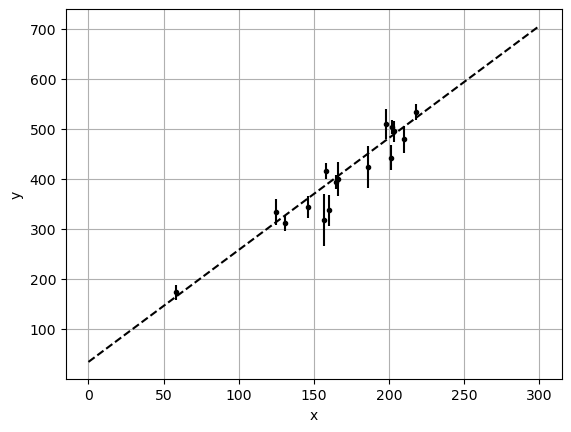

In [49]:
xlim = [0, 300]

def least_squares(x, y, sigma_y):
    A = np.vander(x, 2)
    inv_cov = np.diag(1 / sigma_y ** 2)
    A_reduced_dim = A.T @ inv_cov @ A
    param_cov = np.linalg.inv(A_reduced_dim)
    m, b = np.linalg.solve(A_reduced_dim, A.T @ inv_cov @ y)
    return m, b, np.sqrt(param_cov[0, 0]), np.sqrt(param_cov[1, 1])

m, b, sigma_m, sigma_b = least_squares(x[4:], y[4:], sigma_y[4:])

x_fit = np.linspace(*xlim, 1000)
y_fit = b + m * x_fit
print("y = ({:.2f} +- {:.2f})x + {:.0f} +- {:.0f}".format(m, sigma_m, b, sigma_b))
plt.errorbar(x[4:], y[4:], yerr=sigma_y[4:], fmt=".k")
plt.plot(x_fit, y_fit, ls='--', c='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercise 2

*Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard
uncertainty variance $\sigma^2_m$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you
have included beyond those used in Exercise 1?*

y = (1.08 +- 0.08)x + 213 +- 14


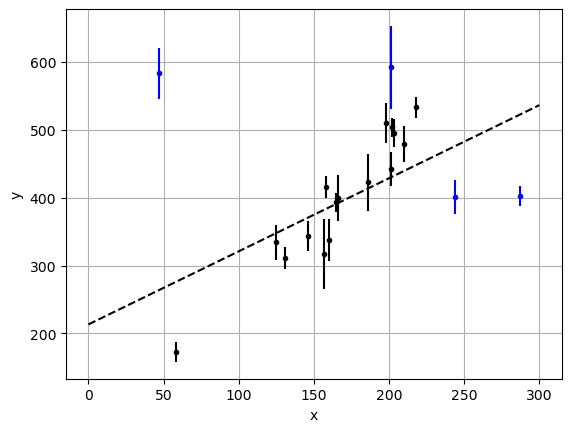

In [50]:
m, b, sigma_m, sigma_b = least_squares(x, y, sigma_y)
y_fit = b + m * x_fit
print("y = ({:.2f} +- {:.2f})x + {:.0f} +- {:.0f}".format(m, sigma_m, b, sigma_b))
plt.errorbar(x[:4], y[:4], yerr=sigma_y[:4], fmt=".b")
plt.errorbar(x[4:], y[4:], yerr=sigma_y[4:], fmt=".k")
plt.plot(x_fit, y_fit, ls='--', c='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The four extra points that were included in this exercise are represented in blue. They have a significant impact on the linear fit: the slope is reduced by more than half and the intercept is adjusted by $\sim 200$ to compensate. As a consequence, the fitted line does not seem to follow the trend in the data that is more clumped together in $x \in [125, 225]$. After a visual inspection, one is eager to classify these extra points as outliers. 

## Exercise 3

*Generalize the method of this Section to fit a general quadratic
(second order) relationship. Add another column to matrix $A$ containing the
values $x^2_i$, and another element to vector $\mathbf{X}$ (call it $q$). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship*
$$ g(x) = qx^2 + mx + b . $$ 
*Your plot should end up looking like Figure 3.*

y = (0.0023 +- 0.0020)x^2 + (1.60 +- 0.58)x + 73 +- 39


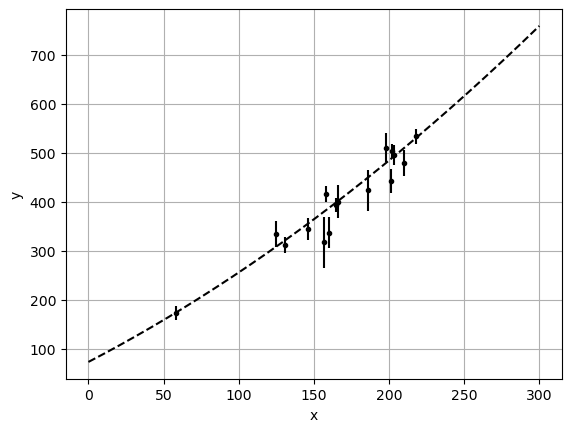

In [59]:
def n_dim_least_squares(x, y, sigma_y, n=2):
    A = np.vander(x, n)
    inv_cov = np.diag(1 / sigma_y ** 2)
    A_reduced_dim = A.T @ inv_cov @ A
    param_cov = np.linalg.inv(A_reduced_dim)
    params = np.linalg.solve(A_reduced_dim, A.T @ inv_cov @ y)
    return params, np.sqrt(np.diagonal(param_cov))

params, param_cov  = n_dim_least_squares(x[4:], y[4:], sigma_y[4:], 3)
y_fit = np.vander(x_fit, 3) @ params

param_matrix = np.array([params, param_cov]).T.flatten()
print("y = ({:.4f} +- {:.4f})x^2 + ({:.2f} +- {:.2f})x + {:.0f} +- {:.0f}".format(*param_matrix))
plt.errorbar(x[4:], y[4:], yerr=sigma_y[4:], fmt=".k")
plt.plot(x_fit, y_fit, ls='--', c='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercise 4

$$ \mathcal{L}(\{t_i\} | T, \sigma_{t_i}) =  \prod_{i=1}^{N} \frac{1}{\sqrt{2 \pi} \sigma_{t_i}} \exp \left( - \frac{(T - t_i)^2}{\sigma_{t_i}^2} \right)$$

$$ \log \mathcal{L}(t_i | T, \sigma_{t_i}) = K - \sum_{i=1}^{N} \left(\frac{T - t_i}{\sigma_{t_i}} \right)^2 $$

$$ \partial_T \log \mathcal{L}(t_i | T, \sigma_{t_i}) = 0 \Leftrightarrow \sum_{i=1}^{N} \left(\frac{T - t_i}{\sigma_{t_i}^2} \right) = 0, $$

and so the optimal $T$ corresponds to the average of the $t_i$ weighted by $1/\sigma_{t_i}^2$.